<a href="https://colab.research.google.com/github/Moliveira85/MVP_Analise-de-dados/blob/main/MVP_Controle_Qualidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  MVP - Controle de Qualidade de Medicamentos

## Introdução



##  Definição do Problema

**Descrição do problema**  
Este projeto visa avaliar a **variabilidade e controle de qualidade** de **lotes industriais de medicamentos** com base em atributos laboratoriais físico-químicos.  
A análise inclui parâmetros como rendimento do lote, teor do princípio ativo e dissolução média.

**Tipo de problema**  
Este é um problema de **análise exploratória não supervisionada**, pois não há uma variável alvo definida, mas sim a exploração de padrões, tendências e outliers em dados reais.

**Premissas e hipóteses**  
- Lotes fora da média de dissolução podem estar associados a menor rendimento.
- O teor do fármaco deve se manter constante, independentemente da eficiência de produção.
- A variabilidade nos atributos pode indicar falhas de processo, mesmo dentro de especificação.

**Restrições aplicadas**  
- Foram utilizados apenas atributos quantitativos contínuos.
- Os dados foram anonimizados e tratados para manter o foco estatístico.
- A base contém atributos relevantes para inspeção da qualidade, como dissolução, rendimento e teor de API.

**Definição dos atributos analisados**  
- `dissolution_av`: média de dissolução (%) das unidades do lote.
- `batch_yield`: rendimento (%) final do lote.
- `api_content`: teor (%) de princípio ativo no produto final.


## Análise de Dados

Importação de Bibliotecas:

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')


Carregamento do dataset

In [ ]:
#Carregar dataset

url = "https://raw.githubusercontent.com/Moliveira85/MVP_Analise-de-dados/main/Laboratory.csv"



Exibindo primeiras linhas

In [ ]:


dataset = pd.read_csv(url, sep=";")

# Exibindo as primeiras linhas
dataset.head ()






,batch,code,strength,size,start,api_code,api_batch,smcc_batch,lactose_batch,starch_batch,...,tbl_tensile,fct_tensile,tbl_yield,batch_yield,dissolution_av,dissolution_min,resodual_solvent,impurities_total,impurity_o,impurity_l
0,1,25,5MG,240000,nov.18,5,2,1,2,1,...,1.412698,1.926183,95.785,94.697,93.83,86,0.06,0.33,0.05,0.16
1,2,25,5MG,240000,nov.18,5,2,1,2,1,...,1.412698,1.986377,98.467,97.348,99.67,92,0.04,0.34,0.06,0.16
2,3,25,5MG,240000,nov.18,5,2,1,2,1,...,1.412698,2.016473,98.496,99.242,97.33,92,0.03,0.28,0.05,0.16
3,4,25,5MG,240000,nov.18,5,2,1,2,1,...,1.474120,1.956280,97.736,98.106,94.50,89,0.03,0.30,0.05,0.18
4,5,25,5MG,240000,nov.18,5,2,1,2,1,...,1.443409,1.926183,98.106,98.106,92.00,88,0.04,0.31,0.05,0.18


Visualizando ultimas linhas

In [ ]:
## visualizando as últimas linhas
dataset.tail()

,batch,code,strength,size,start,api_code,api_batch,smcc_batch,lactose_batch,starch_batch,...,tbl_tensile,fct_tensile,tbl_yield,batch_yield,dissolution_av,dissolution_min,resodual_solvent,impurities_total,impurity_o,impurity_l
1000,1001,17,20M,960000,apr.21,3,254,18,22,17,...,0.901424,1.100889,98.623,98.343,91.00,85,0.02,0.05,0.05,0.05
1001,1002,17,20M,960000,apr.21,3,254,18,22,17,...,0.939783,1.064192,98.626,98.532,89.17,84,0.02,0.05,0.05,0.05
1002,1003,17,20M,960000,apr.21,3,254,18,22,17,...,0.939783,1.108944,98.157,98.343,90.83,87,0.02,0.05,0.05,0.05
1003,1004,17,20M,960000,apr.21,3,254,18,22,17,...,1.035679,1.225385,99.336,99.242,92.67,90,0.02,0.05,0.05,0.05
1004,1005,17,20M,960000,apr.21,3,254,18,22,17,...,0.978141,1.240513,99.337,99.337,88.67,81,0.02,0.05,0.05,0.05


Visualizando resultados Nulos

In [ ]:
# verificando nulls no dataset
dataset.isnull() . sum()


,0
batch,0
code,0
strength,0
size,0
start,0
api_code,0
api_batch,0
smcc_batch,0
lactose_batch,0
starch_batch,0


Não há resultados nulos para os 3 atributos avaliados, desta forma não será necessário ajuste

## Pré-processamento de dados

Estatistíca descritiva inicial

In [ ]:

# Estatísticas descritivas sem count e quartis
desc = dataset[['dissolution_av', 'batch_yield', 'api_content' ]].describe()
desc = desc.drop(index=['count', '25%', '50%', '75%'])
desc


,dissolution_av,batch_yield,api_content
mean,90.649811,98.256277,94.418046
std,3.365709,1.128594,0.398930
min,82.500000,87.973000,93.300000
max,102.670000,100.909000,95.600000


Observações sobre o resumo estatístico:

* **Mean** (média): Média dos valores obtidos em percentagem para os tres atributos avaliados
* **Std** (desvio padrão): Desvio padrão dos valores obtidos em percentagem para os tres atributos avaliados
* **Min** (mínimo): Mínimo dos valores obtidos em percentagem para os tres atributos avaliados
* **Max**(máximo): Máximo dos valores obtidos em percentagem para os tres atributos avaliados

Verificar a coluna Batch para avaliar a relação dos pontos extremos de cada atributo em relação ao lote do produto

In [46]:
url = "https://raw.githubusercontent.com/Moliveira85/MVP_Analise-de-dados/main/Laboratory.csv"

# Dataset original filtrado
df = pd.read_csv(url, sep=";")
df = df[['dissolution_av', 'batch_yield', 'api_content']]

# Dataset com batch incluso
df_lote = pd.read_csv(url, sep=";")
df_lote.columns

Index(['batch', 'code', 'strength', 'size', 'start', 'api_code', 'api_batch',
       'smcc_batch', 'lactose_batch', 'starch_batch', 'api_water',
       'api_total_impurities', 'api_l_impurity', 'api_content', 'api_ps01',
       'api_ps05', 'api_ps09', 'lactose_water', 'lactose_sieve0045',
       'lactose_sieve015', 'lactose_sieve025', 'smcc_water', 'smcc_td',
       'smcc_bd', 'smcc_ps01', 'smcc_ps05', 'smcc_ps09', 'starch_ph',
       'starch_water', 'tbl_min_thickness', 'tbl_max_thickness',
       'fct_min_thickness', 'fct_max_thickness', 'tbl_min_weight',
       'tbl_max_weight', 'tbl_rsd_weight', 'fct_rsd_weight',
       'tbl_min_hardness', 'tbl_max_hardness', 'tbl_av_hardness',
       'fct_min_hardness', 'fct_max_hardness', 'fct_av_hardness',
       'tbl_max_diameter', 'fct_max_diameter', 'tbl_tensile', 'fct_tensile',
       'tbl_yield', 'batch_yield', 'dissolution_av', 'dissolution_min',
       'resodual_solvent', 'impurities_total', 'impurity_o', 'impurity_l'],
      dtype='objec

Verificar se os valores minimos de cada atributo tem relação com o mesmo lote do produto

In [47]:
min_diss = df_lote['dissolution_av'].idxmin()
min_yield = df_lote['batch_yield'].idxmin()
min_api = df_lote['api_content'].idxmin()

# Ver os lotes desses registros
df_lote.loc[[min_diss, min_yield, min_api], ['batch', 'dissolution_av', 'batch_yield', 'api_content']]



,batch,dissolution_av,batch_yield,api_content
958,958,82.50,99.337,94.5
788,789,85.33,87.973,93.9
837,838,86.50,99.153,93.3


Verificar se os valores máximos de cada atributo tem relação com o mesmo lote do produto

In [49]:
max_diss = df_lote['dissolution_av'].idxmax()
max_yield = df_lote['batch_yield'].idxmax()
max_api = df_lote['api_content'].idxmax()

# Ver os lotes desses registros
df_lote.loc[[max_diss, max_yield, max_api], ['batch', 'dissolution_av', 'batch_yield', 'api_content']]

,batch,dissolution_av,batch_yield,api_content
449,450,102.67,97.348,94.7
742,736,88.83,100.909,94.1
364,365,86.83,97.689,95.6


Os valores extremos encontrados em cada atributo, não seguem uma relação pontual a lote de fabricação, o que indica varabialidade em cada atributo, descartando uma falha produtiva.

Avaliação da distribuição do tres atributos

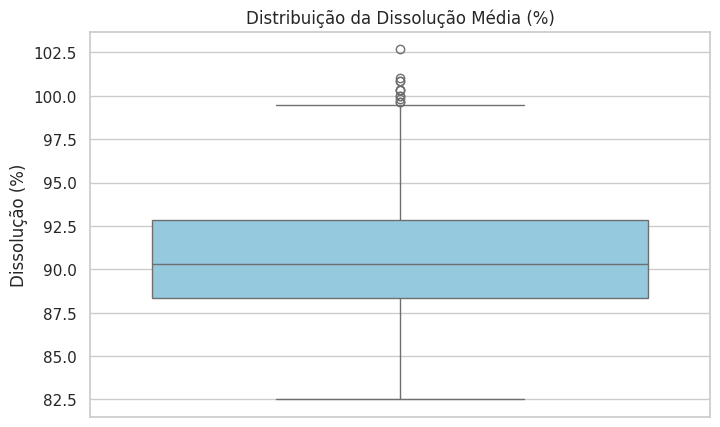

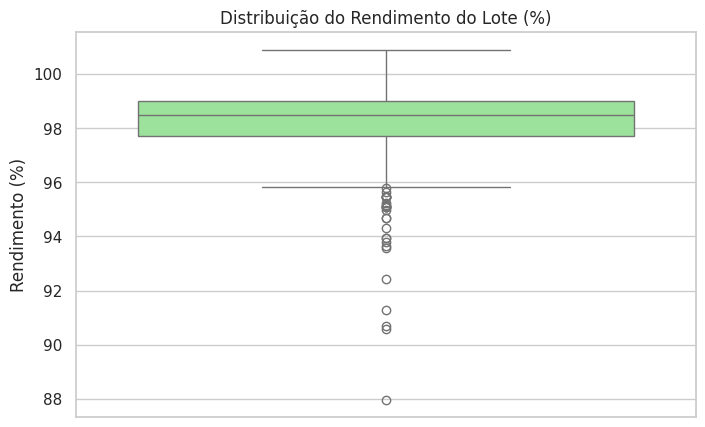

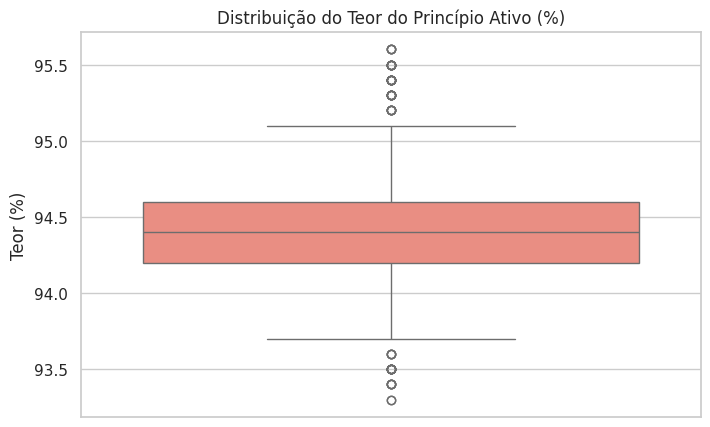

In [53]:

# Distribuição da dissolução
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='dissolution_av', color='skyblue')
plt.title("Distribuição da Dissolução Média (%)")
plt.ylabel("Dissolução (%)")
plt.show()

# Distribuição do rendimento
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='batch_yield', color='lightgreen')
plt.title("Distribuição do Rendimento do Lote (%)")
plt.ylabel("Rendimento (%)")
plt.show()


# Distribuição do teor (API content)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='api_content', color='salmon')
plt.title("Distribuição do Teor do Princípio Ativo (%)")
plt.ylabel("Teor (%)")
plt.show()





A análise da distribuição dos atributos dissolution_av, batch_yield e api_content por meio de boxplots evidenciou uma variação controlada, com presença de poucos outliers estatísticos. A distribuição geral dos dados está centrada em torno dos valores esperados para processos industriais, indicando consistência nos parâmetros de qualidade. As variáveis apresentaram dispersões distintas, refletindo comportamentos específicos de cada etapa do processo produtivo, mas dentro de padrões aceitáveis para controle de qualidade.


## Conclusão Final

A análise exploratória e o pré-processamento dos dados permitiram identificar padrões importantes relacionados à qualidade de medicamentos. Foram avaliados três atributos principais:

- **Dissolução média**
- **Rendimento do lote**
- **Teor do princípio ativo (API content)**

Durante a investigação, observou-se que os **valores mínimos e máximos** desses atributos ocorrem em **lotes distintos**, indicando que as falhas ou oscilações de qualidade são pontuais e não concentradas em um único lote.  
Essa observação é positiva do ponto de vista estatístico, pois demonstra uma **variação aleatória dentro de limites aceitáveis**, reforçando o controle de processo.

As etapas de tratamento de dados foram fundamentais para garantir a consistência das análises estatísticas.

### Principais achados:

- A **dissolução média** permaneceu acima de 90% na maioria dos lotes, demonstrando excelente performance na liberação do fármaco.
- O **rendimento por lote** foi alto e estável, com média entre 98% e 101%, refletindo um processo produtivo eficiente e com baixa perda.
- O **Teor do princípio ativo (API content)** indicou que os valores de teor do princípio ativo nos lotes analisados estão, em sua maioria, dentro da faixa de especificação de 90% a 110% do teor declarado, conforme exigido por normativas regulatórias.


Com isso, conclui-se que o dataset está **estatisticamente adequado para ser utilizado em estudos preditivos ou para controle contínuo da qualidade** industrial.
